# 先端機械学習2022中間レポート Problem 5
核ノルムのproximal operatorを用いたproximal gradient descentによって行列の低ランク近似を行う

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def dataset3():
  #dataset3
  np.random.seed(1234)
  m = 20
  n = 40
  r = 2
  A = np.dot(np.random.rand(m, r), np.random.rand(r, n)).flatten()
  A_org = A.copy().reshape(m,n)
  ninc = 100
  Q = np.random.permutation(m * n)[:ninc]
  A[Q] = None
  A = A.reshape(m, n)

  return A, A_org

In [3]:
def nuclear_norm(Z):
  return np.sum(np.linalg.svd(Z)[1])
def calc_loss(A, Z, lam):
  return np.nansum((A-Z)**2) + lam * nuclear_norm(Z)
def prox_nuclear(A, lam):
  U, s, V = np.linalg.svd(A)
  m,n = A.shape
  r = min(m,n)
  S = np.zeros((m, n))
  S[:r, :r] = np.diag(np.max(s[:,np.newaxis]-lam, initial=0, axis=1))
  return U @ S @ V

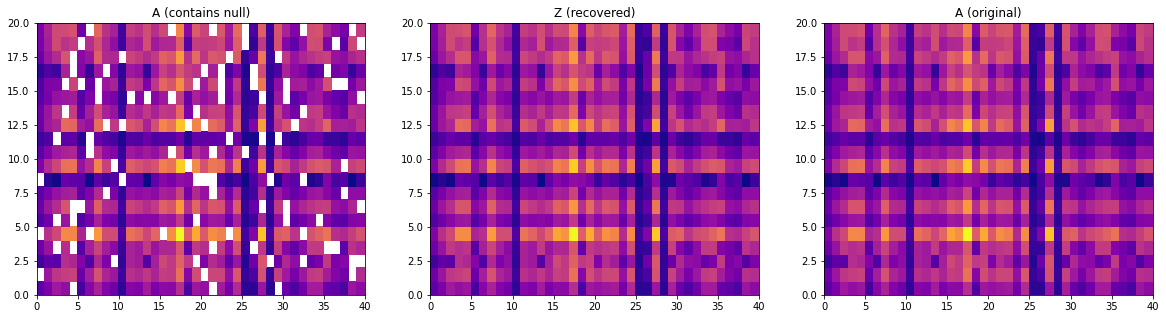

In [4]:
MAX_ITERATION = 1000
lam = 0.1
A, A_org = dataset3()
loss_history = []
#Z = np.nan_to_num(A)
Z = np.zeros(A.shape)
for _ in range(MAX_ITERATION):
  loss = calc_loss(A, Z, lam)
  loss_history.append(loss)
  # 更新
  eta = 1
  grad = 2 * np.nan_to_num(Z - A)
  Z = prox_nuclear(Z - eta * grad, eta * lam)

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,3,1)
ax1.set_title("A (contains null)")
ax2 = fig.add_subplot(1,3,2)
ax2.set_title("Z (recovered)")
ax3 = fig.add_subplot(1,3,3)
ax3.set_title("A (original)")
ax1.pcolor(A, cmap=plt.cm.plasma)
ax2.pcolor(Z, cmap=plt.cm.plasma)
ax3.pcolor(A_org, cmap=plt.cm.plasma)